In [1]:
library(ggbiplot)

Loading required package: ggplot2
Loading required package: plyr
Loading required package: scales
Loading required package: grid


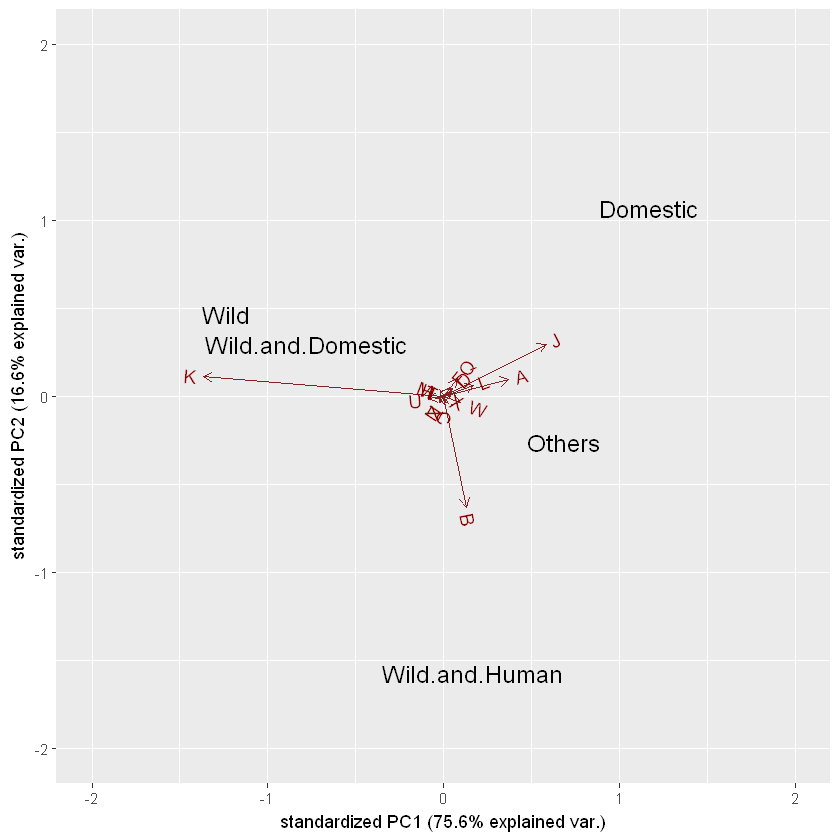

In [2]:
# Figure PCA for motif and category type
df = read.csv('result/pca_tale_type.tsv', sep='\t',header=T)

row.names(df) = df[,1]
df = df[,2:6]
df_t = t(df)

result = prcomp(df_t)

ggbiplot(result, choices=1:2, scale=1, pc.biplot=T, 
         labels=rownames(df_t),
         labels.size=5,
         varname.size=4,
         varname.adjust=2,
         alpha=0.5) + scale_colour_manual(values = c("#FF0000")) + xlim(-2,2) + ylim(-2, 2)


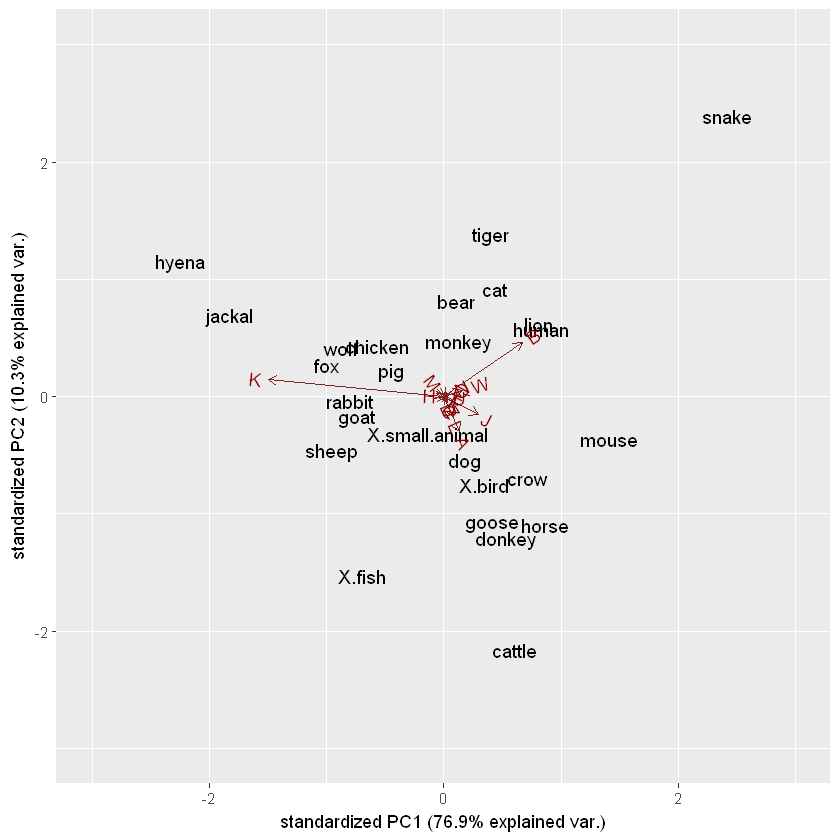

In [3]:
# Figure: PCA for motif and animal

df = read.csv('result/pca_animal.tsv', sep='\t',header=T)

df = df[,c(T,colSums(df[2:ncol(df)]) > 20)]
df = df[rowSums(df[2:nrow(df)]) > 0, ]
row.names(df) = df[,1]
df = df[,2:ncol(df)]
df_t = t(df)
result = prcomp(df_t / colSums(df))

g = ggbiplot(result, choices=1:2, scale=1, pc.biplot=T, 
         labels=rownames(df_t),
         labels.size=4,
         varname.size=4,
         varname.adjust=2,
         alpha=0.5)  + xlim(-3,3) + ylim(-3, 3)
g

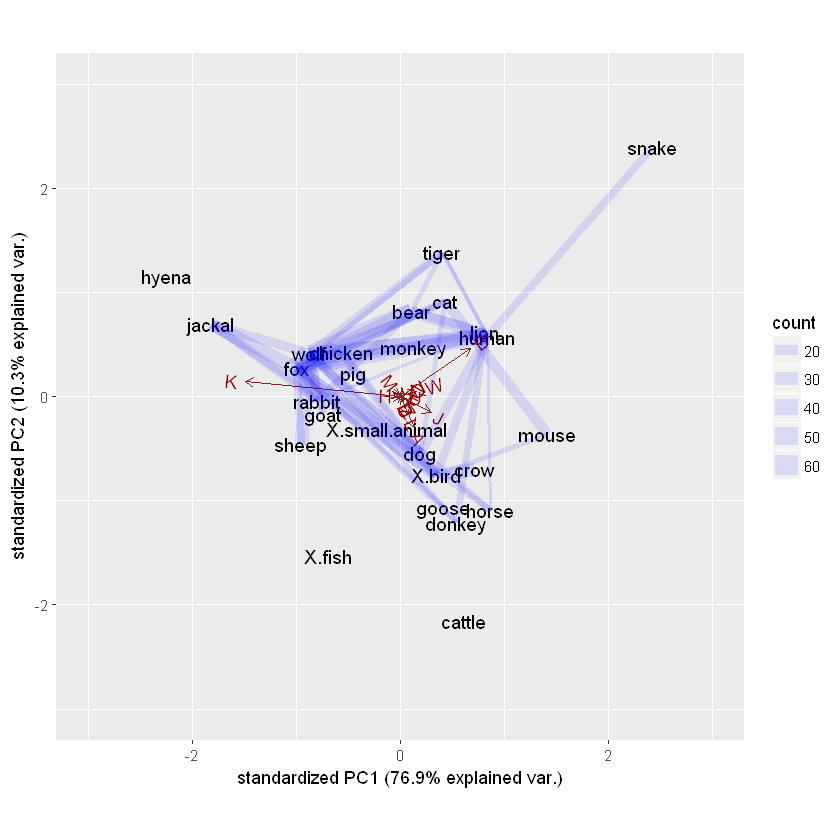

In [4]:
#network
position = g$data

co_data = read.csv('result/cooc_gephi.tsv', sep='\t',header=T)
colnames(co_data) = c('animal0','animal1', 'count')

network = co_data[co_data$count > 10,c('animal0','animal1', 'count')]
network$animal0 = as.character(network$animal0)
network$animal1 = as.character(network$animal1)
network[network['animal0'] == '*bird', ][1] = 'X.bird'
network[network['animal1'] == '*bird', ][2] = 'X.bird'

res = merge(network, position,by.x='animal0', by.y='labels')
colnames(res) = c('animal0', 'animal1', 'count', 'from.x', 'from.y')
res = merge(res, position, by.x='animal1', by.y='labels')
colnames(res) = c('animal0', 'animal1', 'count', 'from.x', 'from.y', 'to.x', 'to.y')

g + geom_segment(data=res, aes(x=from.x, xend=to.x, y=from.y, yend=to.y, size=count), color='blue', alpha=0.1)

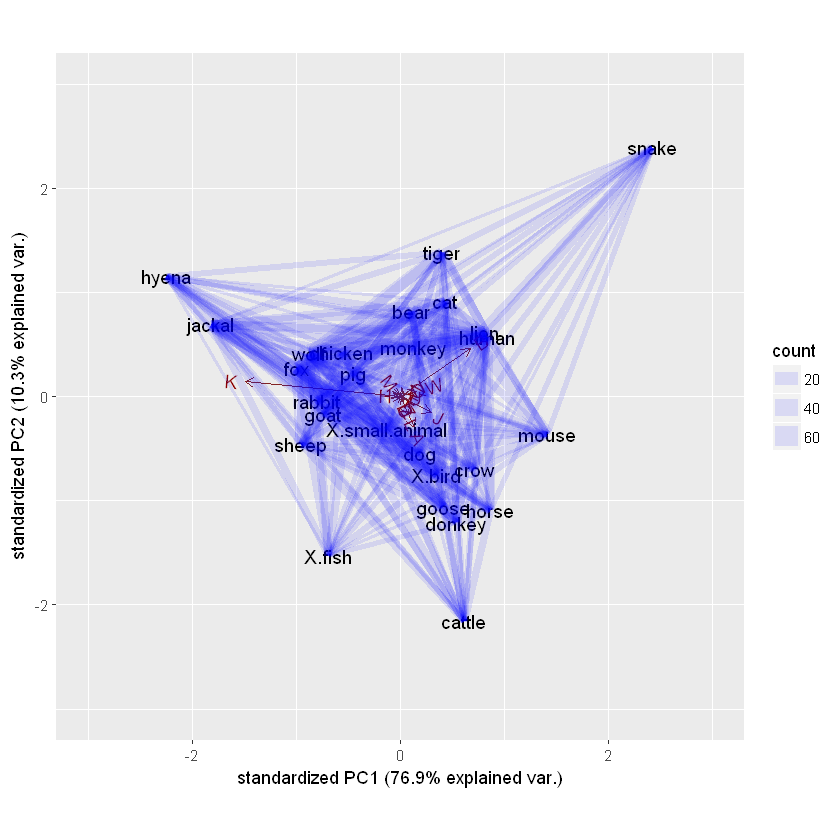

In [5]:
# 
position = g$data

co_data = read.csv('result/cooc_gephi.tsv', sep='\t',header=T)
colnames(co_data) = c('animal0','animal1', 'count')

network = co_data[co_data$count > 0,c('animal0','animal1', 'count')]
network$animal0 = as.character(network$animal0)
network$animal1 = as.character(network$animal1)
network[network['animal0'] == '*bird', ][1] = 'X.bird'
network[network['animal1'] == '*bird', ][2] = 'X.bird'
network[network['animal0'] == '*bug', ][1] = 'X.bug'
network[network['animal1'] == '*bug', ][2] = 'X.bug'
network[network['animal0'] == '*fish', ][1] = 'X.fish'
network[network['animal1'] == '*fish', ][2] = 'X.fish'
network[network['animal0'] == '*small animal', ][1] = 'X.small.animal'
network[network['animal1'] == '*small animal', ][2] = 'X.small.animal'

res = merge(network, position,by.x='animal0', by.y='labels')
colnames(res) = c('animal0', 'animal1', 'count', 'from.x', 'from.y')
res = merge(res, position, by.x='animal1', by.y='labels')
colnames(res) = c('animal0', 'animal1', 'count', 'from.x', 'from.y', 'to.x', 'to.y')

g + geom_segment(data=res, aes(x=from.x, xend=to.x, y=from.y, yend=to.y, size=count), color='blue', alpha=0.1)